### Visualize slices features

In [4]:
%load_ext autoreload
%reload_ext autoreload
from matplotlib import pyplot as plt
%matplotlib inline

import os
import torch
import numpy as np
from dataset import ADNI
from nilearn.image import load_img, smooth_img, clean_img

username = os.environ['USER']
data_dir_prefix = f'/scratch1/{username}/alz'
caps_dir=f'{data_dir_prefix}/ALL_ADNI_MRI_T1/ADNI_CAPS'
caps_type='t1_volume'
atlases_dir=f'{data_dir_prefix}/atlases'
split_filepath=f'{data_dir_prefix}/ALL_ADNI_MRI_T1/ADNI_SPLITS/train.tsv'
# split_filepath=f'{data_dir_prefix}/ALL_ADNI_MRI_T1/ADNI_SPLITS/validationbaseline.tsv'
# split_filepath=f'{data_dir_prefix}/ALL_ADNI_MRI_T1/ADNI_SPLITS/testbaseline.tsv'
num_classes = 3
depth_of_slice = 10
slicing_stride = 5

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Features while preserving_img_shape_in_slices

2023-09-25 17:35:39.845 | SUCCESS  | dataset:__init__:63 - Loaded train split with 5895 subjects
2023-09-25 17:35:40.754 | SUCCESS  | dataset:__init__:75 - Cleaned 0 subjects without labels
2023-09-25 17:35:40.760 | INFO     | dataset:__init__:86 - Preserving original image shape in slices
2023-09-25 17:35:40.795 | INFO     | dataset:__init__:93 - Experiment dir: /scratch1/brizk/alz/ALL_ADNI_MRI_T1/ADNI_CAPS/experiments/prepared_adni_train_3classes_90ds_5ss_preservedshape
2023-09-25 17:35:57.436 | SUCCESS  | dataset:__init__:100 - Loaded already existing slices.
2023-09-25 17:35:57.438 | SUCCESS  | dataset:__init__:185 - Retrieved # of nodes: [116, 200, 400]
2023-09-25 17:35:57.439 | SUCCESS  | dataset:__init__:192 - No fold / 1-fold applied hence sample_id_list=full_sample_id_list


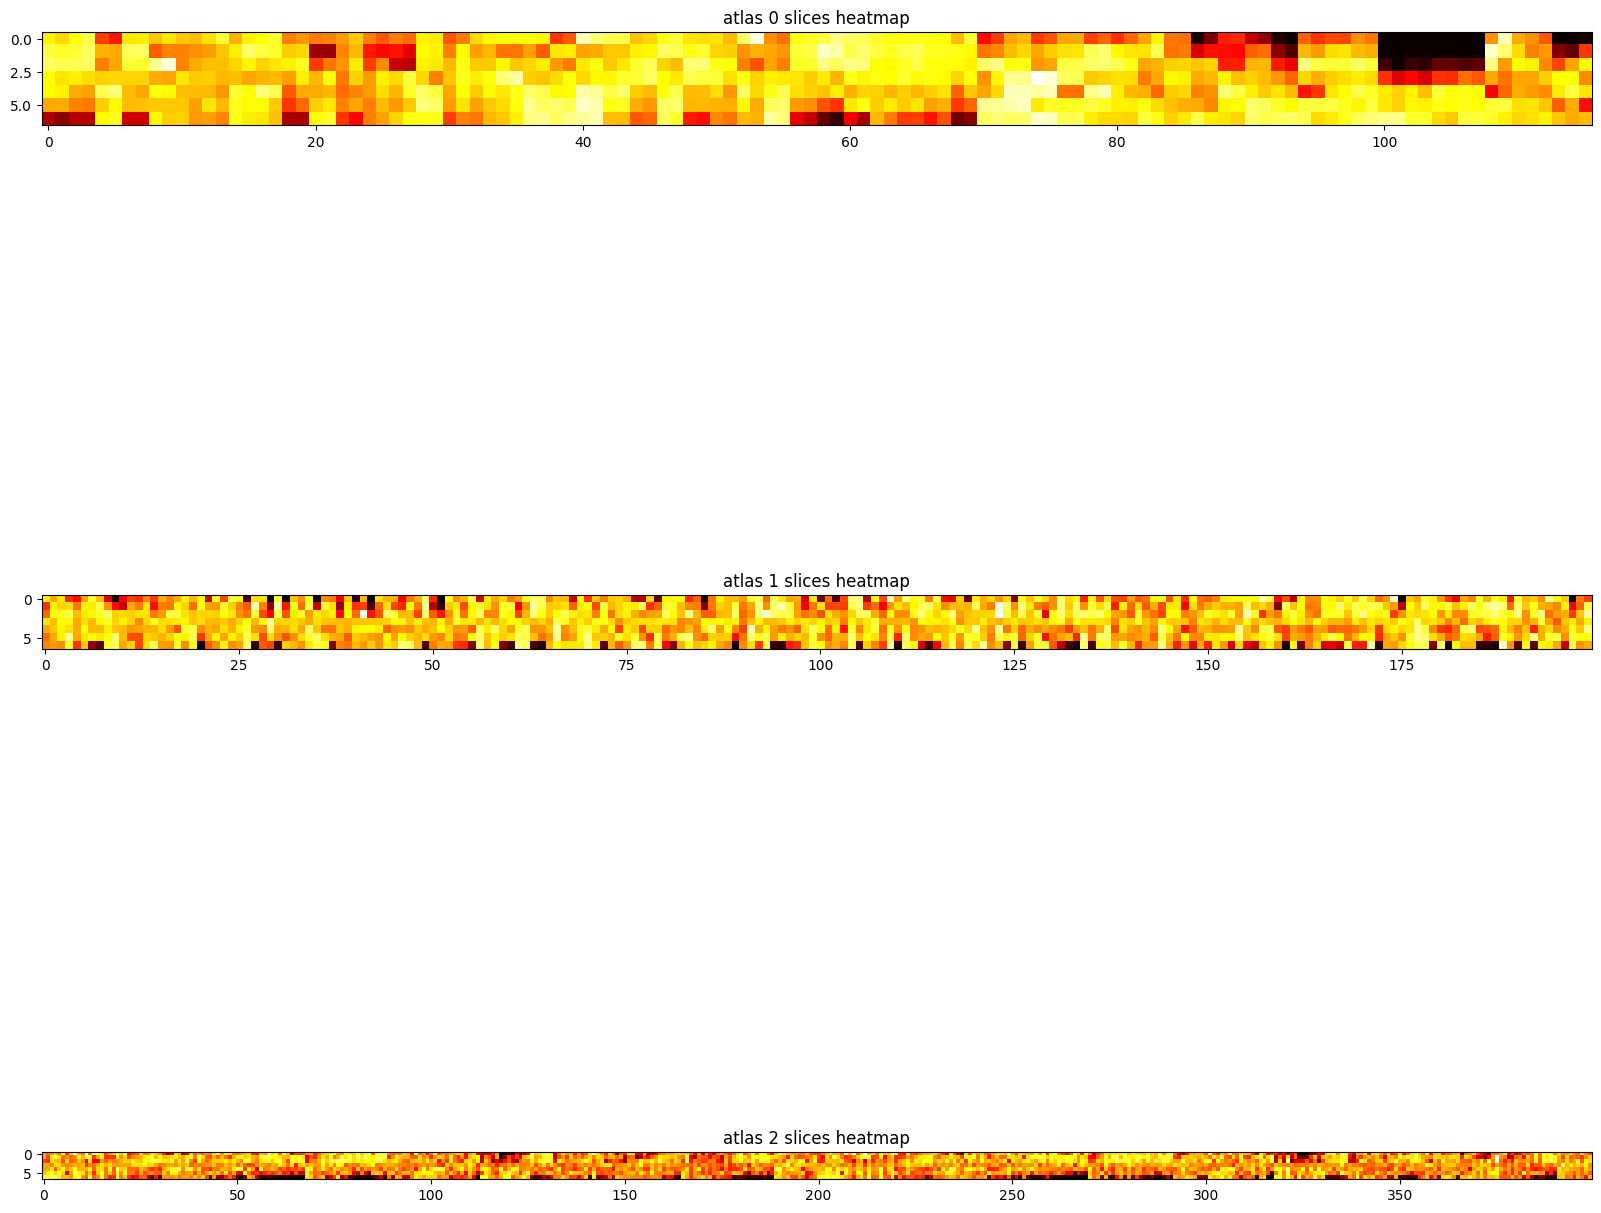

In [3]:
dataset: ADNI = ADNI(
    caps_dir,
    caps_type,
    atlases_dir,
    split_filepath,
    num_classes,
    depth_of_slice,
    slicing_stride,
    preserve_img_shape_in_slices=True,
)

def visualize_in_one_plot_multiple_heatmaps(imgs, titles=None):
    fig, axs = plt.subplots(len(imgs), 1) 
    # enlarge figure size
    fig.set_figheight(20)
    fig.set_figwidth(20)
    for i, (img, title) in enumerate(zip(imgs, titles)):
        axs[i].imshow(img, cmap='hot', interpolation='nearest')
        axs[i].set_title(title)
    plt.show()
    
# for atlas_i, slices_per_atlas in enumerate(dataset[0]['slices_per_atlas'][:1]):
#     print('atlas', atlas_i, 'slices of shape', slices_per_atlas.shape)
#     visualize_heatmap(slices_per_atlas, f'atlas {atlas_i} slices heatmap')

visualize_in_one_plot_multiple_heatmaps(
    dataset[0]['slices_per_atlas'],
    titles=[f'atlas {atlas_i} slices heatmap' for atlas_i in range(len(dataset[0]['slices_per_atlas']))]
)

2023-09-25 17:36:26.685 | SUCCESS  | dataset:__init__:63 - Loaded train split with 5895 subjects
2023-09-25 17:36:28.695 | SUCCESS  | dataset:__init__:75 - Cleaned 0 subjects without labels
2023-09-25 17:36:28.699 | INFO     | dataset:__init__:86 - Preserving original image shape in slices
2023-09-25 17:36:28.709 | INFO     | dataset:__init__:93 - Experiment dir: /scratch1/brizk/alz/ALL_ADNI_MRI_T1/ADNI_CAPS/experiments/prepared_adni_train_3classes_10ds_5ss_preservedshape
2023-09-25 17:37:18.356 | SUCCESS  | dataset:__init__:100 - Loaded already existing slices.
2023-09-25 17:37:18.360 | SUCCESS  | dataset:__init__:185 - Retrieved # of nodes: [116, 200, 400]
2023-09-25 17:37:18.363 | SUCCESS  | dataset:__init__:192 - No fold / 1-fold applied hence sample_id_list=full_sample_id_list


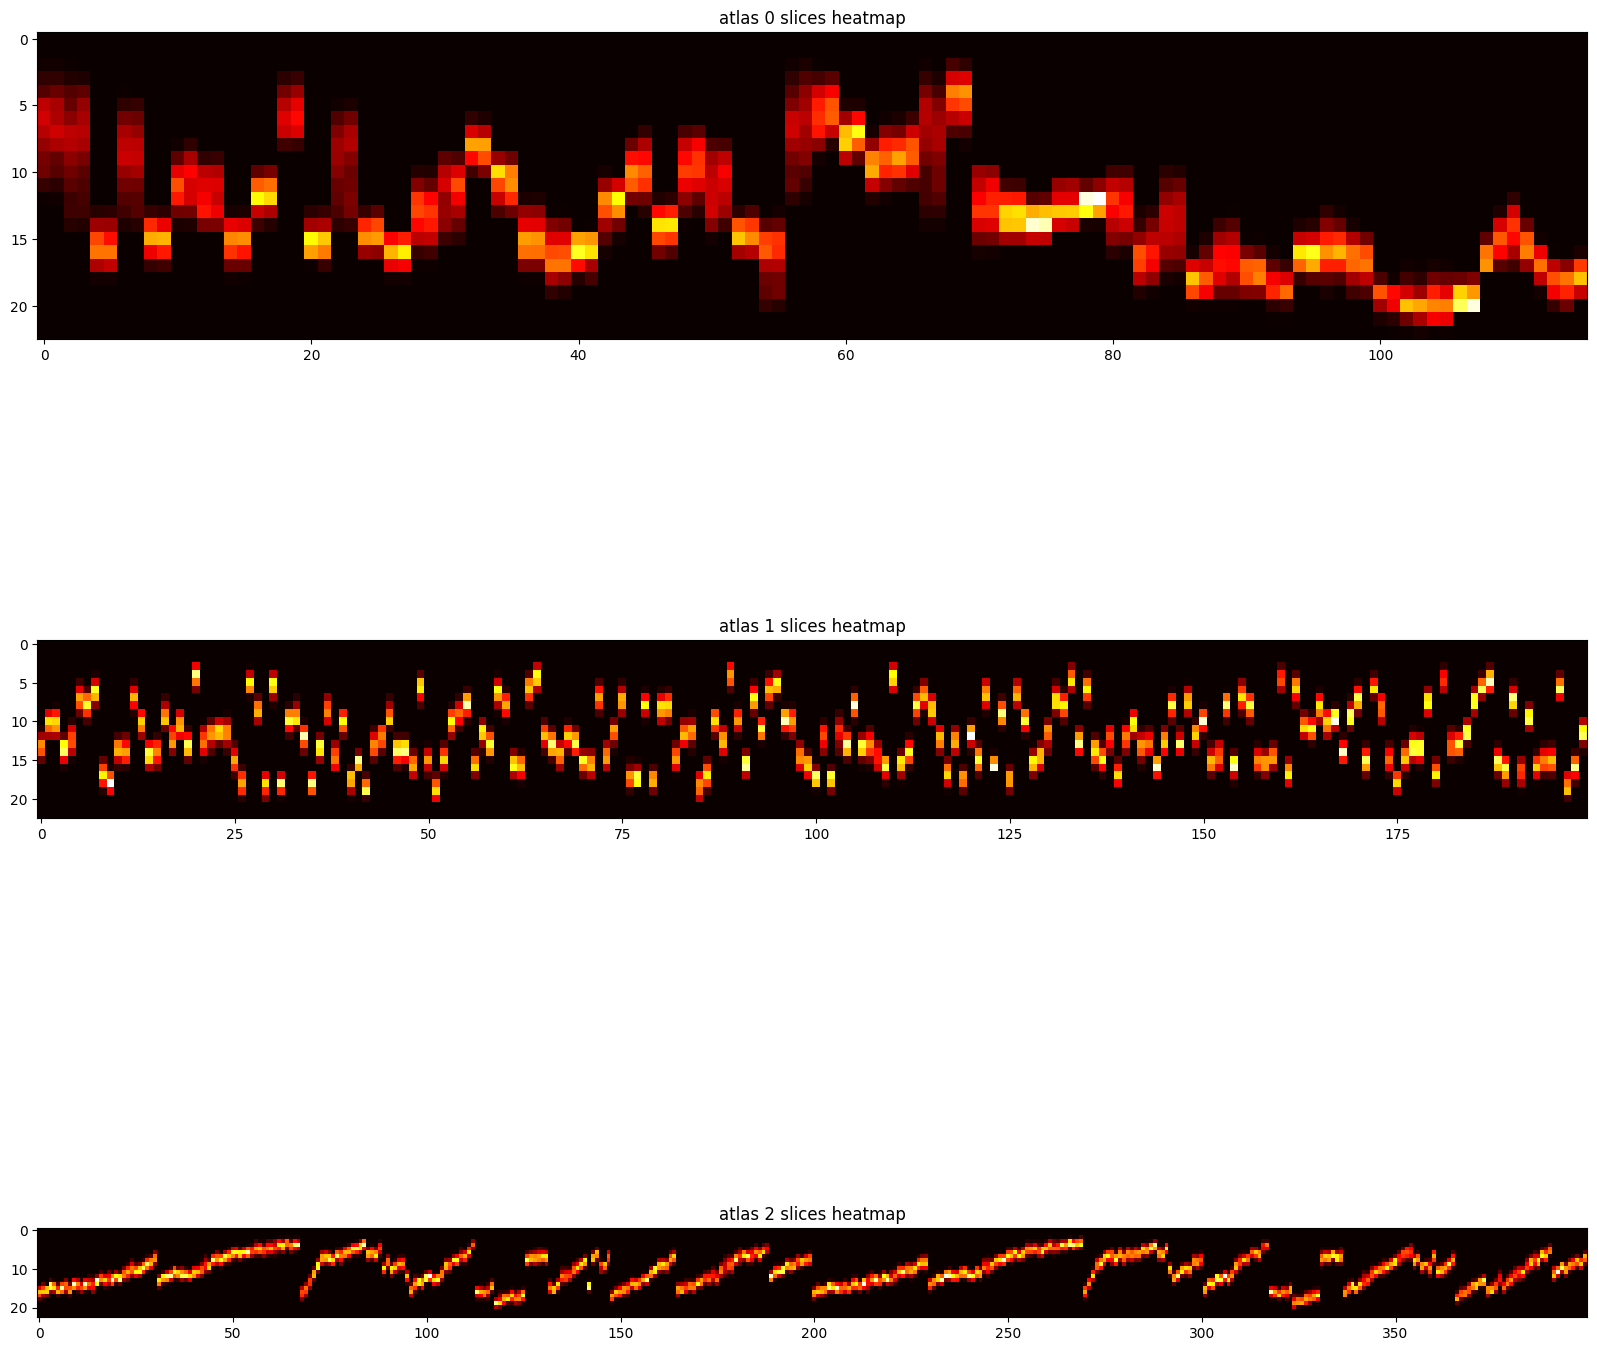

In [5]:
dataset: ADNI = ADNI(
    caps_dir,
    caps_type,
    atlases_dir,
    split_filepath,
    num_classes,
    depth_of_slice,
    slicing_stride,
    preserve_img_shape_in_slices=True,
)

def visualize_in_one_plot_multiple_heatmaps(imgs, titles=None):
    fig, axs = plt.subplots(len(imgs), 1) 
    # enlarge figure size
    fig.set_figheight(20)
    fig.set_figwidth(20)
    for i, (img, title) in enumerate(zip(imgs, titles)):
        axs[i].imshow(img, cmap='hot', interpolation='nearest')
        axs[i].set_title(title)
    plt.show()
    
# for atlas_i, slices_per_atlas in enumerate(dataset[0]['slices_per_atlas'][:1]):
#     print('atlas', atlas_i, 'slices of shape', slices_per_atlas.shape)
#     visualize_heatmap(slices_per_atlas, f'atlas {atlas_i} slices heatmap')

visualize_in_one_plot_multiple_heatmaps(
    dataset[0]['slices_per_atlas'],
    titles=[f'atlas {atlas_i} slices heatmap' for atlas_i in range(len(dataset[0]['slices_per_atlas']))]
)

In [ ]:

sample = dataset.subject_tsv.iloc[0]
participant_id, session_id = sample['participant_id'], sample['session_id']
if data_type == "t1_volume":
    suffix = 't1/spm/segmentation/normalized_space'
    seg_substring = 'Space_T1w'
elif data_type == 't1_linear':
    suffix = 't1_linear'
    seg_substring = 'Sym_res-1x1x1_T1w.nii'
        
data_dir = os.path.join(data_path, 'processed', 'subjects')
path = os.path.join(data_dir, participant_id,
        session_id, suffix)
all_segs = list(os.listdir(path))
img_filename = [
    seg_name for seg_name in all_segs 
    if seg_substring in seg_name
]
assert len(img_filename) == 1
img_filename = img_filename[0]
ni_img = load_img(os.path.join(path, img_filename))
img = np.asanyarray(ni_img.dataobj)
img[np.isnan(img)] = 0
img.shape

In [ ]:
from visualization_aid import preprocess_for_plot3d, plot_cube

IMG_DIM=50

resized = preprocess_for_plot3d(img, IMG_DIM)
plot_cube(resized[:35,::-1,:25], IMG_DIM)

In [ ]:
plot_cube(resized[:,::-1,:], IMG_DIM)

In [ ]:
plt.imshow(img[:,:,95].squeeze())
plt.colorbar()
plt.plot()

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

rows, cols = 3, 4
fig, ax = plt.subplots(nrows=rows, ncols=cols)

selections = list(range(0, img.shape[2], int(img.shape[2]/(rows*cols))))
options = []
x = 0
for j in range(rows):
    for i in range(cols):
        options.append((selections[x], j, i))
        x += 1
        
# print(options)

for s, i, j in options:
    ax[i][j].axis('off')
    ax[i][j].imshow(img[:,:,s].squeeze(), cmap='gray')

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
# print(img.shape)
img_proc = torch.tensor(img.astype(np.float32).squeeze()).rot90(k=1, dims=[0,2])
# print(img_proc.shape)
rows, cols = 3, 4
fig, ax = plt.subplots(nrows=rows, ncols=cols)

selections = list(range(0, img.shape[2], int(img_proc.shape[2]/(rows*cols))))
options = []
x = 0
for j in range(rows):
    for i in range(cols):
        options.append((selections[x], j, i))
        x += 1
        
# print(options)

for s, i, j in options:
    ax[i][j].axis('off')
    ax[i][j].imshow(img_proc[:,:,s].squeeze(), cmap='gray')

In [ ]:
plt.imshow(img[:,:,0].squeeze())
plt.colorbar()
plt.plot()